### Author: Mitchell Krystofiak
### Class: COSC 311 - Lab5
### Date: November 19, 2021
### Description: Implementing the K- Nearest Neigbors supervised and the K- Means unsupervised machine learning algorithms on the iris and adults data sets.

In [9]:
import numpy as np
import pandas as pd
import numpy.linalg as la
from collections import Counter
import copy as cp
from matplotlib import pyplot as plt
import random
from tqdm import tqdm

In [10]:
adults = pd.read_csv('./adult.data', skipinitialspace=True, header=None, names = ['age','workclass','fnlwgt','education',
                     'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss',
                     'hours-per-week','native-country','income'])
iris = pd.read_csv('./iris.data',header=None, names=['Sepal Length','Sepal Width','Petal Length','Petal Width','Class'])

### 2. Implement K Nearest Neighbors alogithm with handmade data testing.

In [11]:
class K_Nearest_Neighbors:
    
    # Takes no parameters, assumes default value k = 3
    def __init__(self, k=3):
        self.k = k
        self.values = []
        self.labels = []
    
    # Sets the data values and labels
    def train(self, a, b):
        self.values = a
        self.labels = b
        
    # Requires a test value   
    def predict(self, test_value):
        
        if len(test_value) != len(self.values[0]):
            print("Test value dimensions do not match trained values dimensions.")
            return
        
        closest = []
        norms = []
        temp_labels = list(self.labels)
        
        for i in range(len(self.values)):
            norms.append([la.norm(self.values[i] - test_value), self.labels[i]]) #keep track of actual class
            
        for i in range(self.k):
            min_value = min(norms)
            closest.append(min_value[1])
            norms.remove(min_value)
            
        return max(closest,key=closest.count)                      

### Handmade data test.

In [12]:
test2 = K_Nearest_Neighbors()

In [13]:
x = np.array([[0,0],[1,0],[0,1],[1,1],[2,1],[2,2],[2,3],[3,1]])
y = np.array(['Blue','Red','Blue','Red','Green','Green','Green','Red'])

In [14]:
test2.train(x, y)

In [15]:
test2.predict([3, 3])

'Green'

In [16]:
test2.predict([.6,.5])

'Red'

### 3. Routine to split a data set given a certain percentage.

In [17]:
def split_data(data, p):
    n = len(data)
    p_train = n*p
    p_test  = n*(1-p)
    copy = cp.deepcopy(data)
    np.random.shuffle(copy)
    return (copy[0:int(p_train)]), (copy[int(p_train):])

In [18]:
train_set, test_set = split_data(x, .75)

In [19]:
train_set

array([[2, 2],
       [0, 0],
       [2, 1],
       [2, 3],
       [1, 0],
       [3, 1]])

In [20]:
test_set

array([[0, 1],
       [1, 1]])

### 4. Implement and test K-Means on Iris dataset.

In [21]:
class K_Means:
    
    def __init__(self, k=3, tol=.0001, iters=1000):
        self.k = k
        self.tol = tol
        self.iters = iters
        self.centers = {}
        self.classes = {}
        
    def train(self, data):
        
        ## Randomly shuffle data to pick out random centers.
        copy = cp.deepcopy(data)
        np.random.shuffle(copy)
        
        ## Pick out random centers.
        for i in range(self.k):
            self.centers[i] = copy[i]
        
        """
         For the max number of iterations, or up until the tolerance is reached,
         reset the classes and fill in an empty position, calculate the norms,
         pick out the minimum distances, and then grab k classifications.
         
         The previous values are kept to check the tolerance threshold and see if 
         we are converging towards a mean, or if we are oscillating.
        
        """
        for i in range(self.iters):
            self.classes = {}
            done = False
        
            for j in range(self.k):
                self.classes[j] = []
            
            for j in data:
                norms = [la.norm(j - self.centers[c]) for c in self.centers]
                min_value = norms.index(min(norms))
                self.classes[min_value].append(j)
            
            previous_centers = dict(self.centers)
            
            for j in self.classes:
                self.centers[min_value] = np.average(self.classes[min_value], axis = 0)
            
            for j in self.centers:
                
                old_value = previous_centers[j]
                new_value = self.centers[j]
                
                if np.sum((new_value - old_value)/old_value * 100.0) <= self.tol:
                    done = True
            
            if done:
                break
        
    def predict(self, test_value):
        norms = [la.norm(test_value - self.centers[c]) for c in self.centers]
        min_value = norms.index(min(norms))
        return min_value
        

### Using two columns of data at a time from the Iris set. Also using Lab3 code to show the actual classes it belongs to.

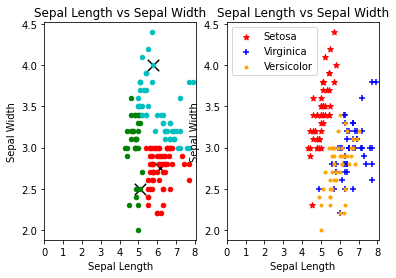

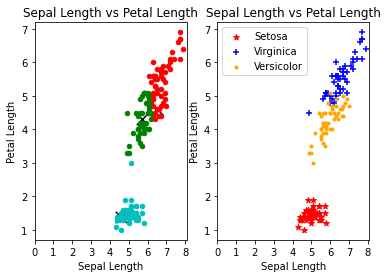

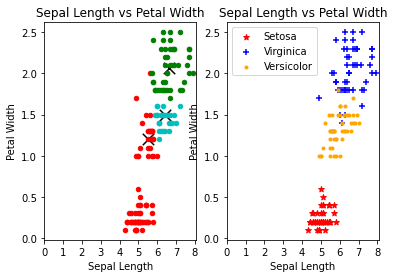

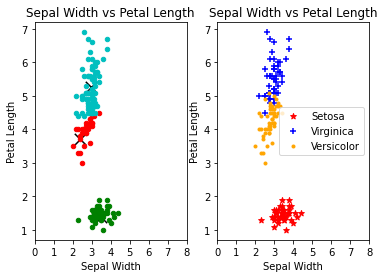

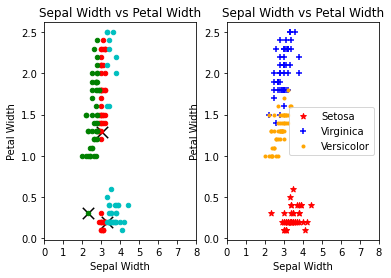

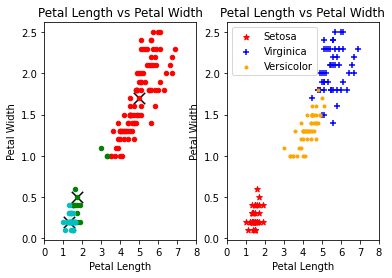

<Figure size 432x288 with 0 Axes>

In [22]:
setosa = iris[iris['Class'] == 'Iris-setosa']
virginica = iris[iris['Class'] == 'Iris-virginica']
versicolor = iris[iris['Class'] == 'Iris-versicolor']

km = K_Means()
colors = 10*['r','g','c','b','k'] # good for up to k = 5
for i in range(4):
    plt.clf()
    for j in range(i+1,4):
        values = iris[[iris.columns[i],iris.columns[j]]].values
        km.train(values)
        plt.subplot(1,2,1)
        for k in km.centers:
            plt.scatter(km.centers[k][0], km.centers[k][1], color='k', s= 130, marker = 'x')
        plt.title(f'{iris.columns[i]} vs {iris.columns[j]}')
        plt.xlabel(iris.columns[i])
        plt.ylabel(iris.columns[j])
        for k in km.classes:
            color = colors[k]
            for m in km.classes[k]:
                plt.scatter(m[0],m[1], color = color, s = 20)
        plt.xticks(np.arange(0,8.5))
        
        plt.subplot(1,2,2)
        plt.scatter(x=setosa[setosa.columns[i]].values, y=setosa[setosa.columns[j]].values, color='red', marker='*')
        plt.scatter(x=virginica[virginica.columns[i]].values, y=virginica[virginica.columns[j]].values, color='blue', marker='+')
        plt.scatter(x=versicolor[versicolor.columns[i]].values, y=versicolor[versicolor.columns[j]].values, color='orange', marker='.')
        plt.legend(['Setosa','Virginica','Versicolor'])
        plt.xlabel(setosa.columns[i])
        plt.ylabel(setosa.columns[j])
        plt.title(f'{setosa.columns[i]} vs {setosa.columns[j]}')
        plt.xticks(np.arange(0,8.5))

        plt.show()        

Couldn't get the figsize command to work how I wanted it :(.
Judging by the graphs of each comparison, we do get some error:
- The Sepal Length vs Sepal Width graph loses about half of the actual setosa class and makes it it's own class entirely. It also doesn't appear to respond well to a mixed class situation.
- The Sepal Length vs Petal Length graph classified the separate setosa section well, but when the two other classes started mixing, it just drew a boundary between the top and bottom.
- The Sepal Length vs Petal Width graph was very interesting and the clustering happened in a vertical manner. I expected it to work like the other two, since the boundaries were kind of defined, but maybe this just behaved the way it did because of the randomness.
- The Sepal Width vs Petal Length did a very good job at classifying, but again with the mixing, it has to draw a border.
- The Sepal Width vs Petal Width did again a good job, mixing errors.
- The Petal Length vs Petal Width behaved sort of unusually, but not really. It does have difficulty deciphering between two mixed or side by side data sets.

### Using all four columns at a time.

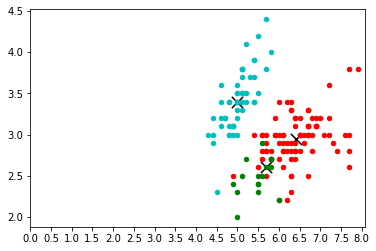

In [23]:
km = K_Means()
values = iris[['Sepal Length','Sepal Width','Petal Length','Petal Width']].values
km.train(values)
for k in km.centers:
    plt.scatter(km.centers[k][0], km.centers[k][1], color='k', s= 130, marker = 'x')
for i in km.classes:
    color = colors[i]
    for j in km.classes[i]:
        plt.scatter(j[0],j[1], color = color, s = 20)
    plt.xticks(np.arange(0,8.5, 0.5))

plt.title("Results of K-Mean Clustering on Iris Dataset")
plt.xlabel("")

These results are not exactly as expected, since we know that we have 50 points for each of the classes, yet our 'red' category is very small and the others are very large. Again, this probably has to do with mixed data values. If we had a training algorithm similar to this one that adjusted based on the correctness (say, neural network weights) or an algorithm to, instead of forming linear boundary lines, could build jagged boundary lines, we might classify these flowers better.

### 5. Use KNN on the Iris dataset.

In [475]:
knn = K_Nearest_Neighbors()

In [476]:
values = iris[['Sepal Length','Sepal Width','Petal Length','Petal Width']].values
labels = iris['Class'].values

## For the life of me, I could not figure out a better way to do this.
data = []
for i in range(len(values)):
    data.append([values[i],labels[i]])
    
train_set, test_set = split_data(data, .8)

train_values = []
train_labels = []
for i in range(len(train_set)):
    train_values.append(train_set[i][0])
    train_labels.append(train_set[i][1])
    
test_values = []
test_labels = []
for i in range(len(test_set)):
    test_values.append(test_set[i][0])
    test_labels.append(test_set[i][1])



In [477]:
knn.train(train_values, train_labels)

### a. Confusion matrix (similar)

In [478]:
errors = 0
correct = 0
for i in range(len(test_values)):
    prediction = knn.predict(test_values[i])
    if (prediction is test_labels[i]):
        correct += 1
    else:
        errors += 1
print(f"Using 80% of the data (120 values) to train the model, and then testing it")
print(f"with the other 20% of the data (30 values), we get {correct} correct predictions")
print(f"and {errors} wrong predictions, giving a accuracy of {correct/(correct+errors)*100}%.")

Using 80% of the data (120 values) to train the model, and then testing it
with the other 20% of the data (30 values), we get 30 correct predictions
and 0 wrong predictions, giving a accuracy of 100.0%.


### b. Changing the ratio of training sets to testing sets.

In [479]:
## Going to test 10 different trials
for i in range(10):
    p = random.uniform(0,1)
    data = []
    for i in range(len(values)):
        data.append([values[i],labels[i]])
    
    train_set, test_set = split_data(data, p)

    train_values = []
    train_labels = []
    for i in range(len(train_set)):
        train_values.append(train_set[i][0])
        train_labels.append(train_set[i][1])
    
    test_values = []
    test_labels = []
    for i in range(len(test_set)):
        test_values.append(test_set[i][0])
        test_labels.append(test_set[i][1])

    knn.train(train_values, train_labels)
    
    errors = 0
    correct = 0
    for i in range(len(test_values)):
        prediction = knn.predict(test_values[i])
        if (prediction is test_labels[i]):
            correct += 1
        else:
            errors += 1
    print(f"Train = {p*100}%, Test = {(1-p)*100}, Correct = {correct}, Errors = {errors}, Accuracy = {correct/(correct+errors)*100}%")
    print('\n')

Train = 7.773958347147769%, Test = 92.22604165285223, Correct = 130, Errors = 9, Accuracy = 93.5251798561151%


Train = 78.88278189586589%, Test = 21.117218104134107, Correct = 31, Errors = 1, Accuracy = 96.875%


Train = 49.60055847588548%, Test = 50.39944152411452, Correct = 72, Errors = 4, Accuracy = 94.73684210526315%


Train = 14.006706109400724%, Test = 85.99329389059928, Correct = 122, Errors = 7, Accuracy = 94.57364341085271%


Train = 96.55716888063324%, Test = 3.4428311193667627, Correct = 6, Errors = 0, Accuracy = 100.0%


Train = 92.69388075344544%, Test = 7.306119246554554, Correct = 9, Errors = 2, Accuracy = 81.81818181818183%


Train = 21.133810596103707%, Test = 78.86618940389629, Correct = 111, Errors = 8, Accuracy = 93.27731092436974%


Train = 65.94386947165295%, Test = 34.05613052834705, Correct = 51, Errors = 1, Accuracy = 98.07692307692307%


Train = 29.176488703366132%, Test = 70.82351129663387, Correct = 104, Errors = 3, Accuracy = 97.19626168224299%


Train = 3

In the above itterations, we randomly select p between 0 and 1 to split the dataset into the train and test sets. We see a variety of results, but some outliers are the 15% training data with a 89% accuracy and the 26% training data with the 95% accuracy. We would expect more training data to mean higher accuracy. However, as I'm about to find out in the next few cells, it appears that the random shuffling of the data in the 'split_data' function makes quite a difference. We do have consistency with the higher train percentages always resulting in a decently high percentage, indicating that more train data does impact the accuracy.

### c. Testing the impact of the random shuffle in the split_data function.

In [480]:
## Going to test 10 different trials
for i in range(10):
    p = .1 #set p here
    data = []
    for i in range(len(values)):
        data.append([values[i],labels[i]])
    
    train_set, test_set = split_data(data, p)

    train_values = []
    train_labels = []
    for i in range(len(train_set)):
        train_values.append(train_set[i][0])
        train_labels.append(train_set[i][1])
    
    test_values = []
    test_labels = []
    for i in range(len(test_set)):
        test_values.append(test_set[i][0])
        test_labels.append(test_set[i][1])

    knn.train(train_values, train_labels)
    
    errors = 0
    correct = 0
    for i in range(len(test_values)):
        prediction = knn.predict(test_values[i])
        if (prediction is test_labels[i]):
            correct += 1
        else:
            errors += 1
    print(f"Train = {p*100}%, Test = {(1-p)*100}, Correct = {correct}, Errors = {errors}, Accuracy = {correct/(correct+errors)*100}%")
    print('\n')

Train = 10.0%, Test = 90.0, Correct = 112, Errors = 23, Accuracy = 82.96296296296296%


Train = 10.0%, Test = 90.0, Correct = 127, Errors = 8, Accuracy = 94.07407407407408%


Train = 10.0%, Test = 90.0, Correct = 111, Errors = 24, Accuracy = 82.22222222222221%


Train = 10.0%, Test = 90.0, Correct = 133, Errors = 2, Accuracy = 98.51851851851852%


Train = 10.0%, Test = 90.0, Correct = 122, Errors = 13, Accuracy = 90.37037037037037%


Train = 10.0%, Test = 90.0, Correct = 129, Errors = 6, Accuracy = 95.55555555555556%


Train = 10.0%, Test = 90.0, Correct = 128, Errors = 7, Accuracy = 94.81481481481482%


Train = 10.0%, Test = 90.0, Correct = 130, Errors = 5, Accuracy = 96.29629629629629%


Train = 10.0%, Test = 90.0, Correct = 130, Errors = 5, Accuracy = 96.29629629629629%


Train = 10.0%, Test = 90.0, Correct = 115, Errors = 20, Accuracy = 85.18518518518519%




After setting p = .8, we get consistently high results, with the lowest accuracy being 90%.
After setting p = .9, we get high results, but our low is 87%. 
After setting p = .5, we get still high results, with our lowest being the 93%.

It appears that we do see a consistent trend with more train data meaning more accuracy. However, we do see the randomness at play and we see different results every time we run the split_data function. 

### 6. Implementing the  KNN algorithm on the adults data set, or trying to at least.

The way I would try to determine the 'distance' between two adults is to make everything numerical that isn't. For example, we have a lot of data about marital status, working class, education, occupation, etc. We may want to figure out how many unique values of each there are and enumerate them. Something along the lines of 0->High School, 1->Associates, 2->Bachelors, and we would probably want to doctor the data in a 'rated' way, saying that a Bachelors degree is 'better' than an Associates degree. However, we really start to encounter some problems here, because what does 'better' mean? Why is 'never-married' better/worse than 'Married'? Who decides? This quickly starts to spiral into an impossible process. We may be able to use some of our basic statistics on each of the columns and see what categories make more money. For example, if we have high school, bachelors and associates, if we say that each of them have a >50K class and <=50K class, we could use that percentage to rate each category, sort them accordingly, and then enumerate.

Another way to think about the adults data set is to only include numerical values. Just cut out the non-numerical information and use what we can to proceed. This does lose a lot of good indicators, though.

In [481]:
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Just using what we have.

In [486]:
values = adults[['education-num','hours-per-week']].values
labels = adults['income'].values

In [487]:
values

array([[13, 40],
       [13, 13],
       [ 9, 40],
       ...,
       [ 9, 40],
       [ 9, 20],
       [ 9, 40]], dtype=int64)

In [488]:
knn = K_Nearest_Neighbors()

### This was taking forever since we have so much data, or something is not working properly, probably the amount of data.

In [489]:
for i in tqdm(range(5)):
    p = .8 #set p here
    data = []
    for i in range(len(values)):
        data.append([values[i],labels[i]])
    
    train_set, test_set = split_data(data, p)

    train_values = []
    train_labels = []
    for i in range(len(train_set)):
        train_values.append(train_set[i][0])
        train_labels.append(train_set[i][1])
    
    test_values = []
    test_labels = []
    for i in range(len(test_set)):
        test_values.append(test_set[i][0])
        test_labels.append(test_set[i][1])

    knn.train(train_values, train_labels)
    
    errors = 0
    correct = 0
    for i in range(len(test_values)):
        prediction = knn.predict(test_values[i])
        if (prediction is test_labels[i]):
            correct += 1
        else:
            errors += 1
    print(f"Train = {p*100}%, Test = {(1-p)*100}, Correct = {correct}, Errors = {errors}, Accuracy = {correct/(correct+errors)*100}%")
    print('\n')

  0%|                                                                                            | 0/5 [02:03<?, ?it/s]


KeyboardInterrupt: 

I want to try my other idea but honestly I'm just so tired of school work and need a break. Happy Thanksgiving!